In [ ]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_csv('full_grouped.csv')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# First, let's look at the basic info
df.head()


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [ ]:
df.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa
35155,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


No Missing Values: The dataset contains 35156 non-null entries for each column, indicating that there are no missing values. This ensures that the data is complete and ready for analysis.

Data Types:
The Date column is correctly identified as a datetime64[ns] data type, which allows for time series analysis.

The numerical columns (Confirmed, Deaths, Recovered, Active, New cases, New deaths, New recovered) are of type int64, which is appropriate for representing counts and other integer values.

The categorical columns (Country/Region and WHO Region) are of type object, indicating that they contain string-based data (e.g., country names, regions). These will need to be encoded if used in machine learning models.

In [ ]:
df.describe()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,35156,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2020-04-24 12:00:00,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
min,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,2020-03-08 18:00:00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2020-04-24 12:00:00,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,2020-06-10 06:00:00,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000
std,NaN,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852



### Key Observations:
- Significant variability across regions, particularly in confirmed cases, deaths, recoveries, and active cases.
- There are negative values in **Active**, **New deaths**, and **New recovered**, suggesting potential data quality issues that need to be addressed during data cleaning.
- The dataset reflects both early and peak pandemic conditions, showing both low numbers in the initial stages and high numbers as the pandemic progressed.
"""




In [ ]:
# Replace negative values with NaN
df['Active'] = df['Active'].apply(lambda x: np.nan if x < 0 else x)
df['New deaths'] = df['New deaths'].apply(lambda x: np.nan if x < 0 else x)
df['New recovered'] = df['New recovered'].apply(lambda x: np.nan if x < 0 else x)

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Date               0
Country/Region     0
Confirmed          0
Deaths             0
Recovered          0
Active             2
New cases          0
New deaths        38
New recovered     77
WHO Region         0
dtype: int64


In [ ]:
#filling missing values with median
df['Active'].fillna(df['Active'].median(), inplace=True)
df['New deaths'].fillna(df['New deaths'].median(), inplace=True)
df['New recovered'].fillna(df['New recovered'].median(), inplace=True)

<ipython-input-47-9f231cead104>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Active'].fillna(df['Active'].median(), inplace=True)
<ipython-input-47-9f231cead104>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
df.isnull().sum()

,0
Date,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
WHO Region,0


In [ ]:
# Check and drop duplicate rows
df = df.drop_duplicates()

In [ ]:
# Inspect the cleaned data
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0.0,0,0.0,0.0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0.0,0,0.0,0.0,Europe
2,2020-01-22,Algeria,0,0,0,0.0,0,0.0,0.0,Africa
3,2020-01-22,Andorra,0,0,0,0.0,0,0.0,0.0,Europe
4,2020-01-22,Angola,0,0,0,0.0,0,0.0,0.0,Africa


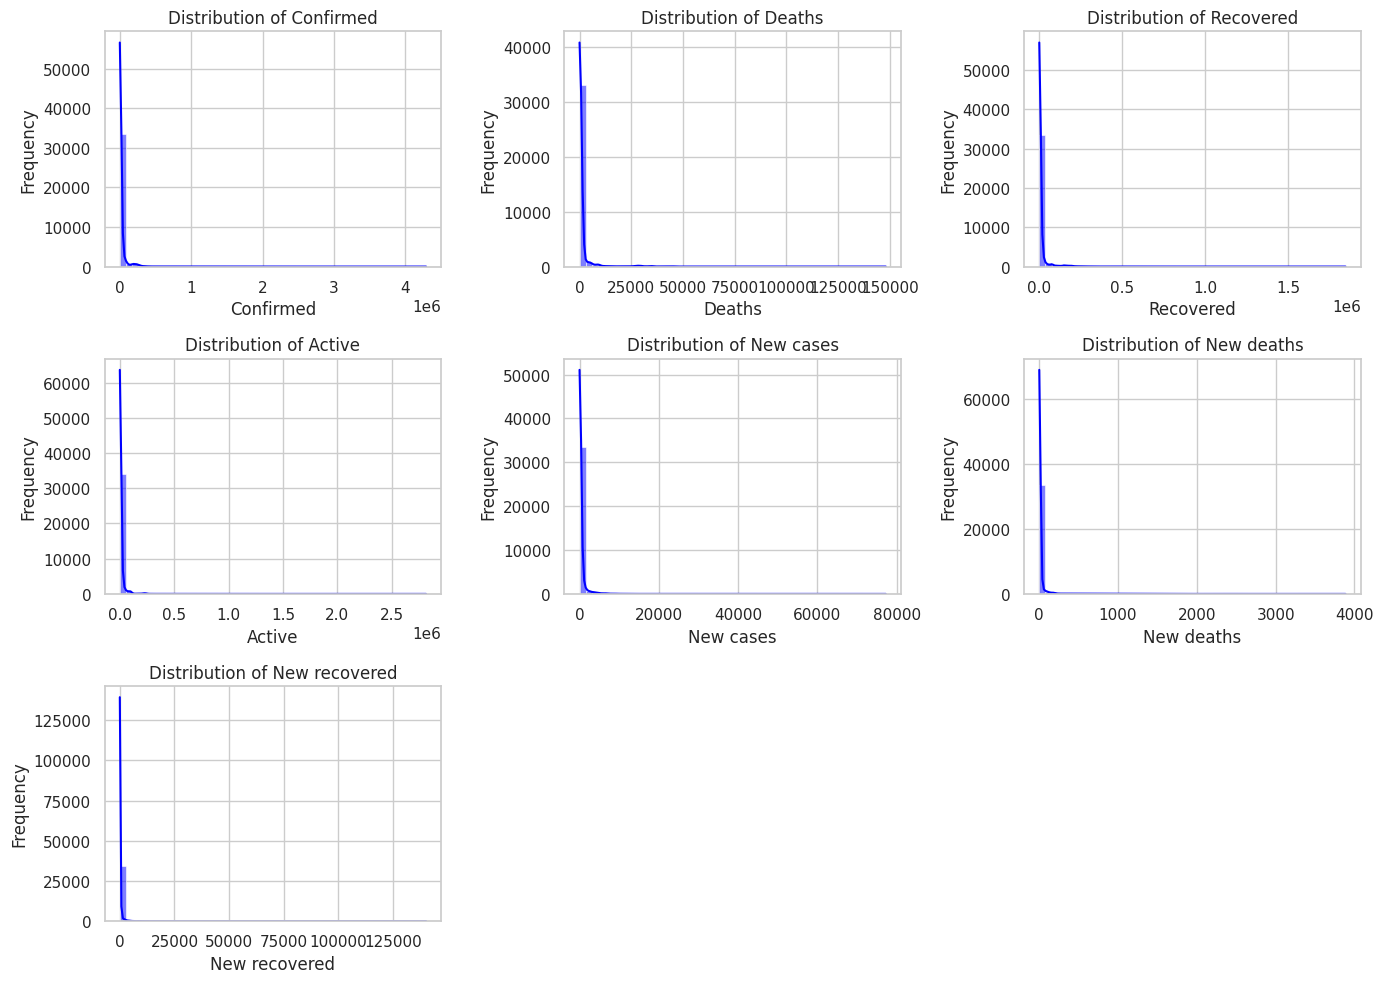

In [ ]:
# List of numerical columns in the dataset
numerical_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']

# Set the figure size
plt.figure(figsize=(14, 10))

# Loop through the numerical columns and plot their histograms
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns of subplots
    sns.histplot(df[col], kde=True, color='blue', bins=50)  # You can adjust the number of bins as needed
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The histograms showed heavily right-skewed distributions for variables like Confirmed, Deaths, Recovered, etc.

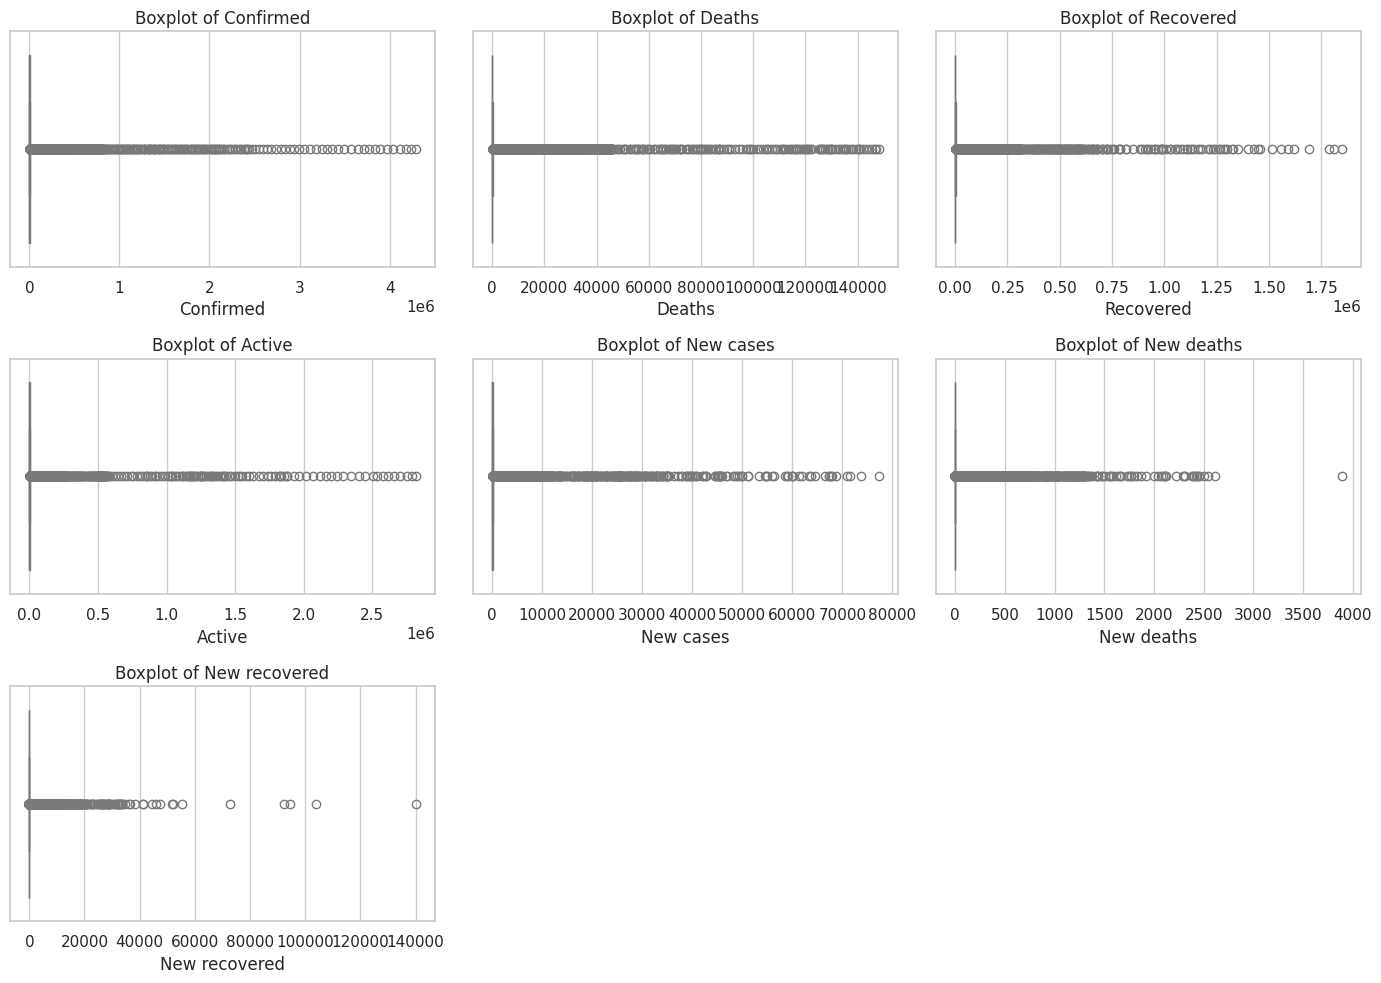

In [ ]:
# Boxplots for all numerical variables to check for outliers
plt.figure(figsize=(14, 10))

# Loop through numerical columns and create boxplots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()



The boxplots confirm what the histograms suggested: The data has a significant number of outliers. The long tails represent extreme values for all features, including Confirmed, Deaths, and New Cases.

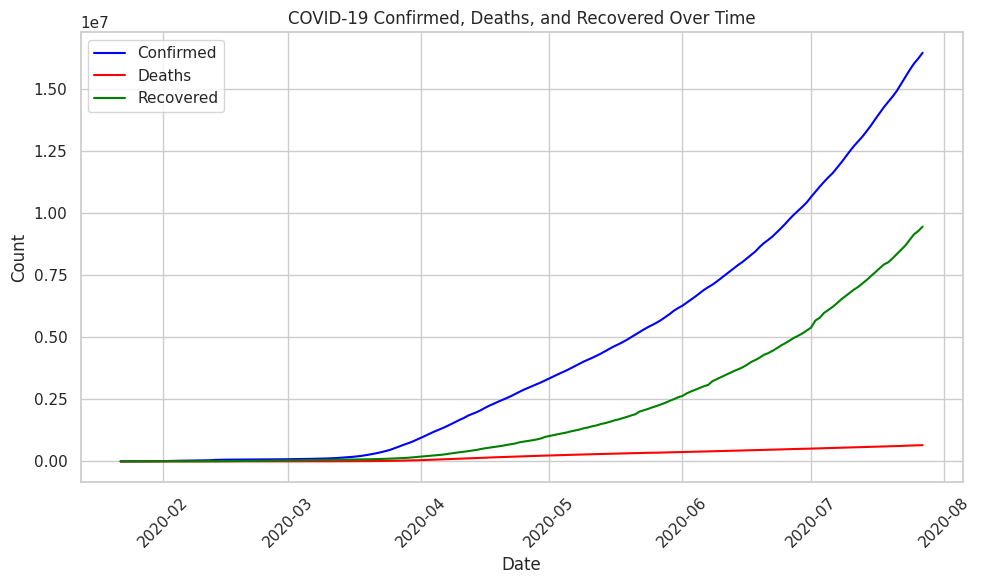

In [ ]:
# Plot time trends for confirmed, deaths, and recoveries
plt.figure(figsize=(10,6))
plt.plot(df.groupby('Date')['Confirmed'].sum(), label='Confirmed', color='blue')
plt.plot(df.groupby('Date')['Deaths'].sum(), label='Deaths', color='red')
plt.plot(df.groupby('Date')['Recovered'].sum(), label='Recovered', color='green')
plt.title('COVID-19 Confirmed, Deaths, and Recovered Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-54-e02992f04974>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top_10_countries, palette='viridis')


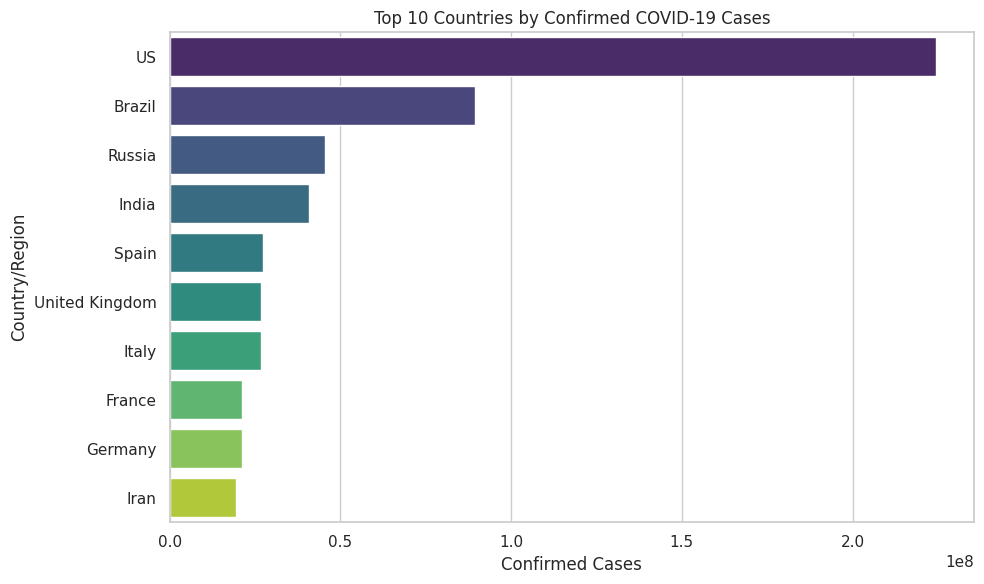

In [ ]:
country_stats = df.groupby('Country/Region')[numerical_columns].sum().reset_index()
# Top 10 countries with the highest confirmed cases
top_10_countries = country_stats.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country/Region')
plt.tight_layout()
plt.show()


<ipython-input-55-1d108b436c07>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WHO Region', y='Confirmed', data=who_region_stats, palette='muted')


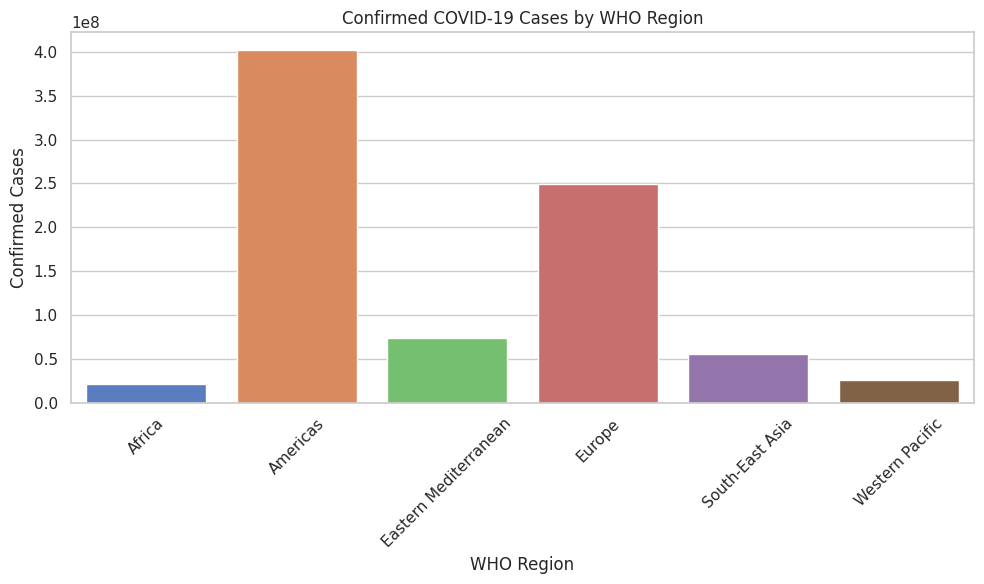

In [ ]:
who_region_stats = df.groupby('WHO Region')[numerical_columns].sum().reset_index()

# Bar plot for comparison of regions
plt.figure(figsize=(10,6))
sns.barplot(x='WHO Region', y='Confirmed', data=who_region_stats, palette='muted')
plt.title('Confirmed COVID-19 Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

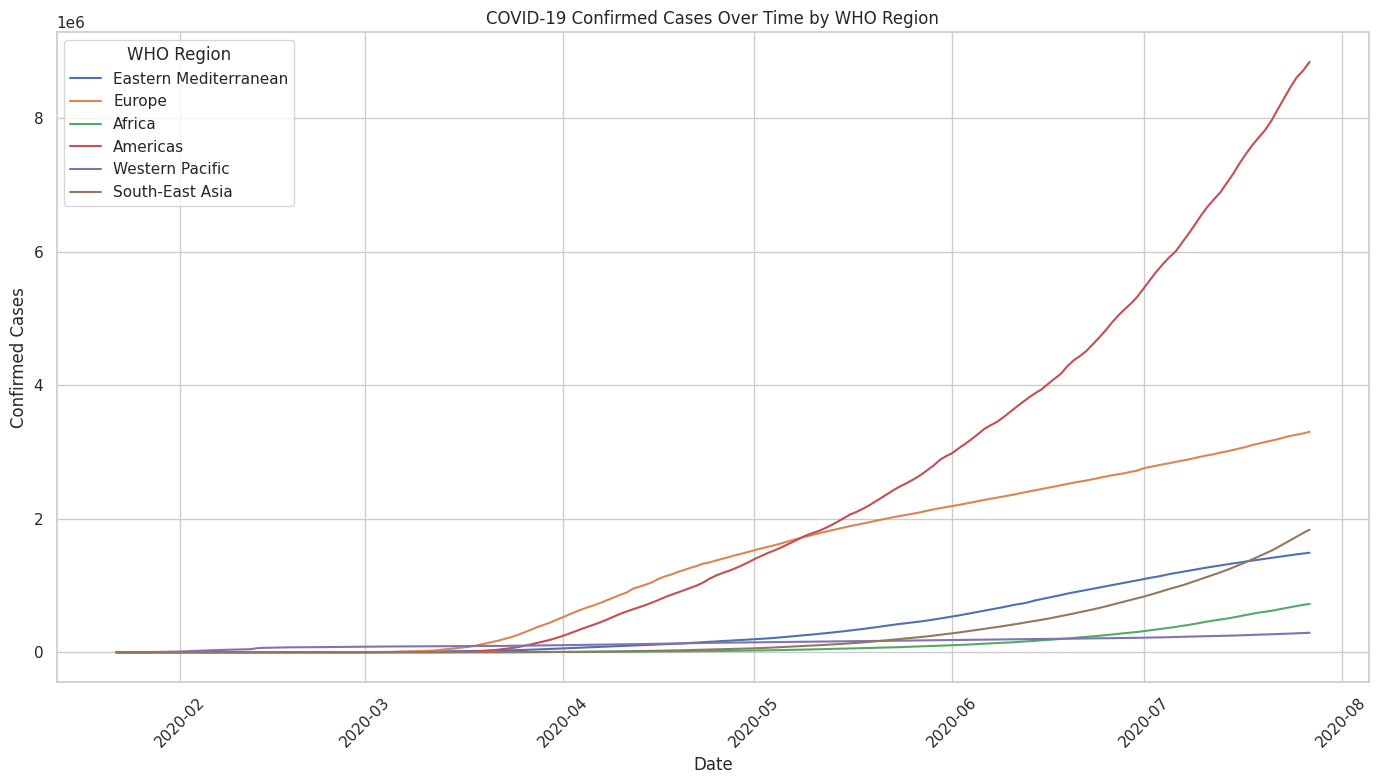

In [ ]:
plt.figure(figsize=(14, 8))
regions = df['WHO Region'].unique()

for region in regions:
    region_data = df[df['WHO Region'] == region].groupby('Date')['Confirmed'].sum()
    plt.plot(region_data, label=region)

plt.title('COVID-19 Confirmed Cases Over Time by WHO Region')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(title='WHO Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


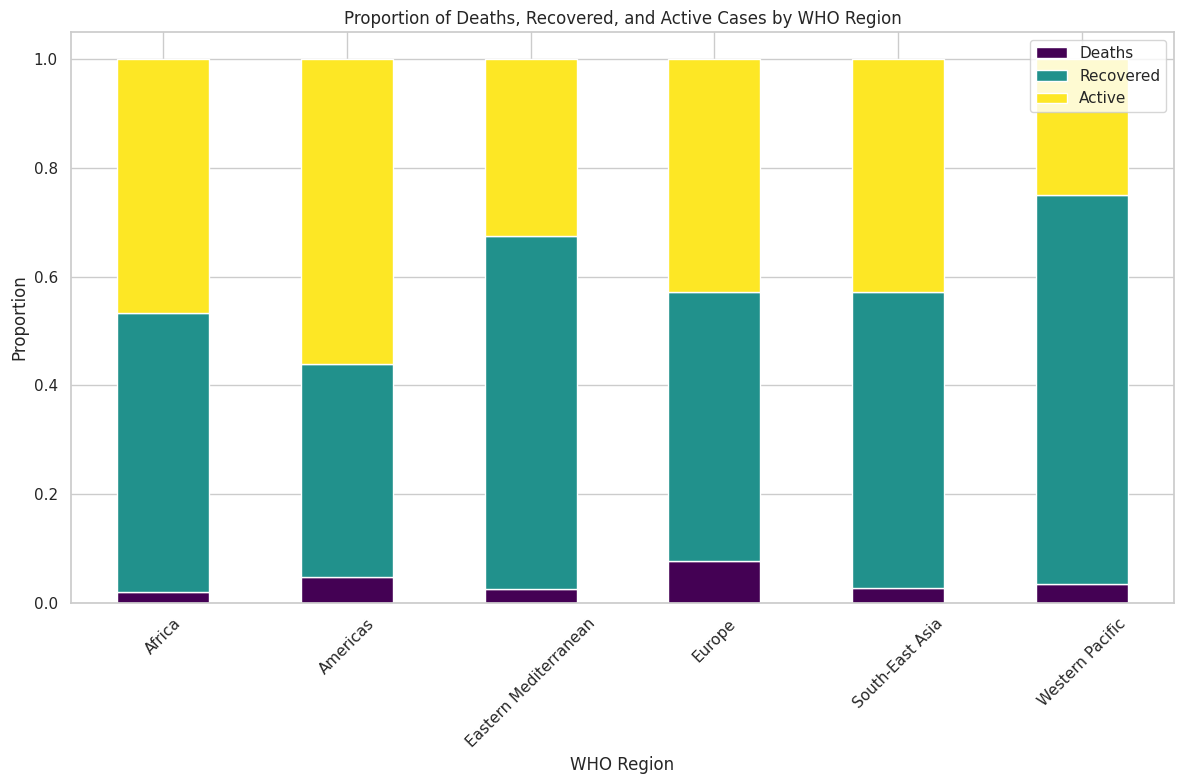

In [ ]:
# Aggregate data by WHO Region
region_stats = df.groupby('WHO Region')[['Deaths', 'Recovered', 'Active']].sum()
region_stats_percentage = region_stats.div(region_stats.sum(axis=1), axis=0)

region_stats_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Proportion of Deaths, Recovered, and Active Cases by WHO Region')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


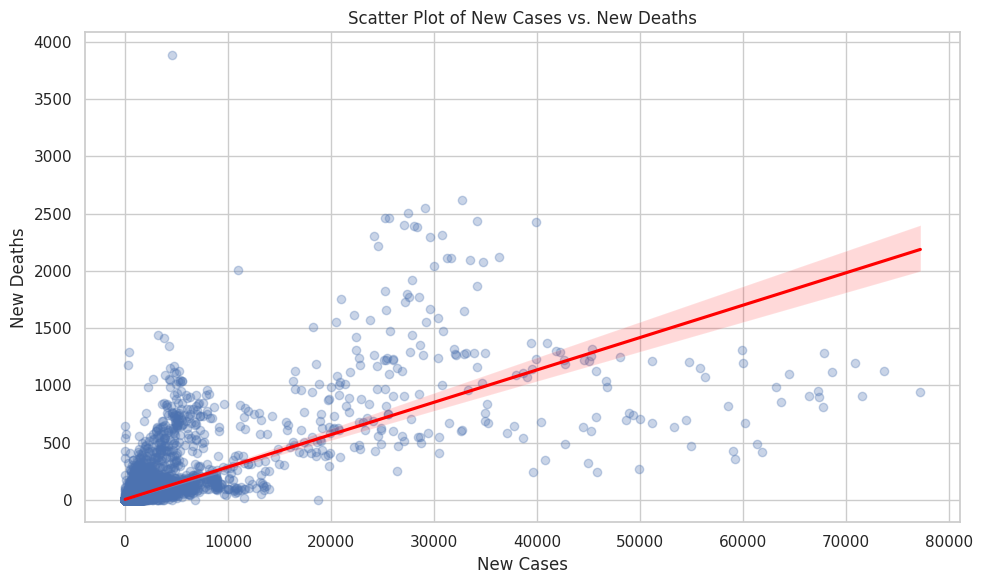

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='New cases', y='New deaths', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Scatter Plot of New Cases vs. New Deaths')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate daily growth rates
growth_features = ['Confirmed', 'Deaths', 'Recovered', 'Active']

for col in growth_features:
    df[f'{col}_daily_growth'] = df[col].diff() / df[col].shift(1)

# Calculate mortality ratio
df['mortality_ratio'] = df['Deaths'] / df['Confirmed']

# Calculate recovery ratio
df['recovery_ratio'] = df['Recovered'] / df['Confirmed']


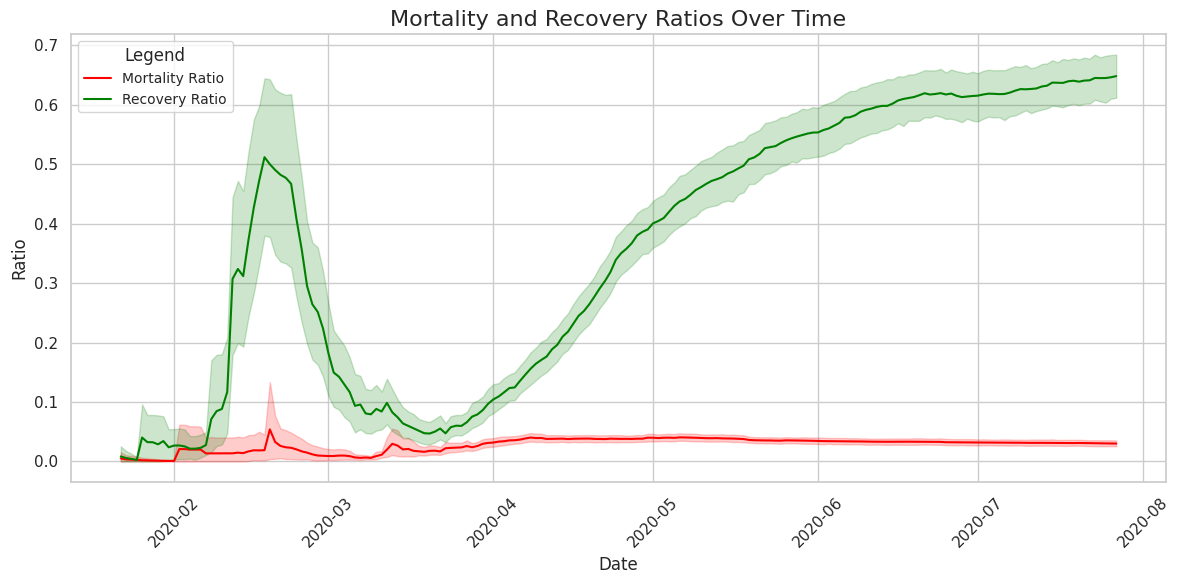

In [ ]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='mortality_ratio', data=df, label='Mortality Ratio', color='red')
sns.lineplot(x='Date', y='recovery_ratio', data=df, label='Recovery Ratio', color='green')

# Add titles and labels
plt.title('Mortality and Recovery Ratios Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ratio', fontsize=12)

# Add legend and grid
plt.legend(title='Legend', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

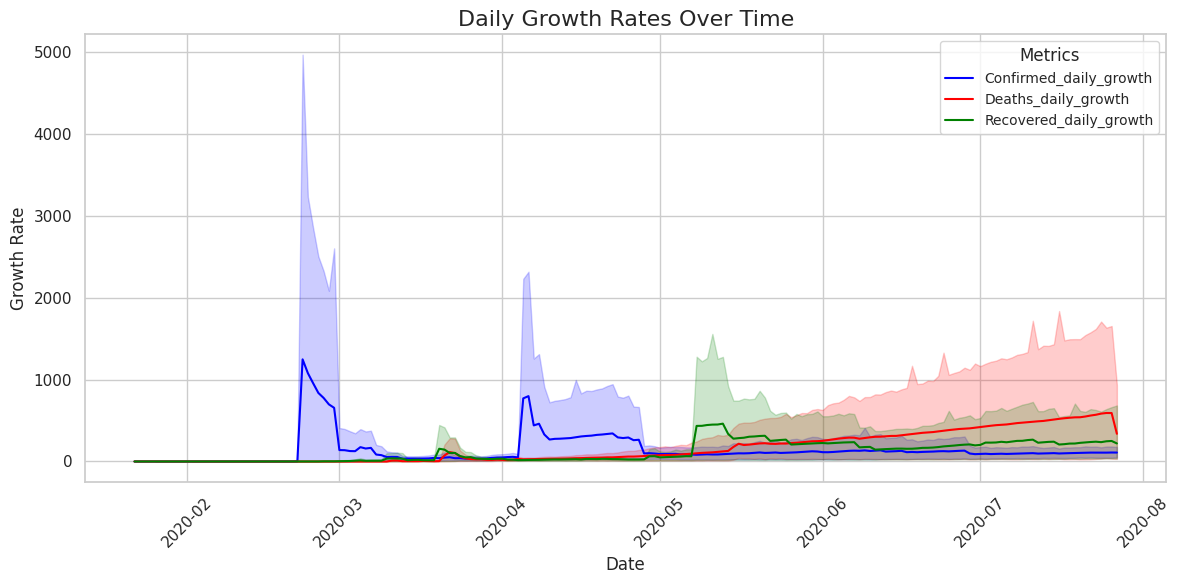

In [ ]:
# Set Seaborn style
sns.set(style='whitegrid')

# Melt the data for better handling with Seaborn
melted_data = df.melt(
    id_vars=['Date'],
    value_vars=['Confirmed_daily_growth', 'Deaths_daily_growth', 'Recovered_daily_growth'],
    var_name='Metric',
    value_name='Daily Growth'
)

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Daily Growth', hue='Metric', data=melted_data, palette=['blue', 'red', 'green'])

# Add titles and labels
plt.title('Daily Growth Rates Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Growth Rate', fontsize=12)

# Customize legend
plt.legend(title='Metrics', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

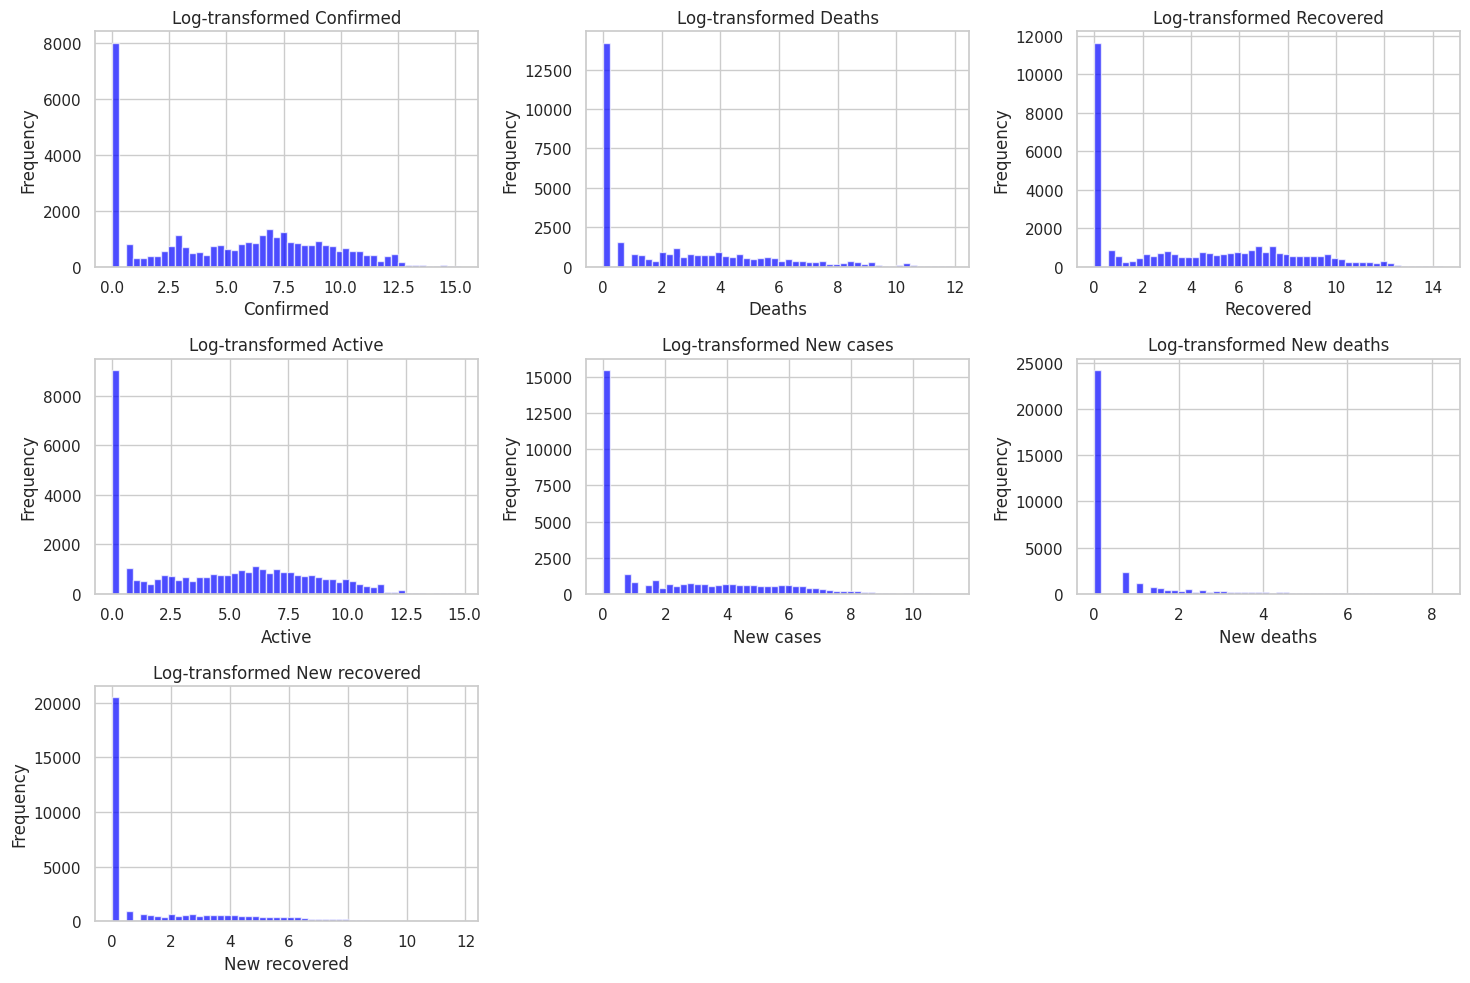

In [ ]:

# Apply log transformation to selected columns
log_transformed_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']
for col in log_transformed_columns:
    df[f'log_{col}'] = np.log1p(df[col])  # log1p handles zeros by adding 1 before log

# Plot the log-transformed data
plt.figure(figsize=(15, 10))
for i, col in enumerate(log_transformed_columns):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[f'log_{col}'], bins=50, color='blue', alpha=0.7)
    plt.title(f'Log-transformed {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


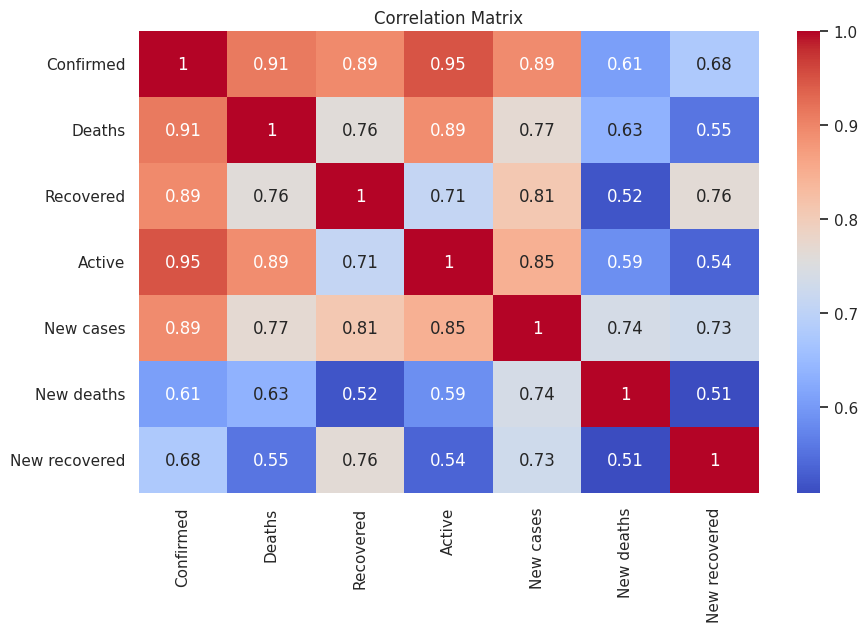

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
# Calculate the correlation matrix from the DataFrame 'df' using the specified columns
correlation_matrix = df[log_transformed_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
#standardizing the log transformed columns
scaler = StandardScaler()
df[log_transformed_columns] = scaler.fit_transform(df[log_transformed_columns])
df.head()


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,...,Active_daily_growth,mortality_ratio,recovery_ratio,log_Confirmed,log_Deaths,log_Recovered,log_Active,log_New cases,log_New deaths,log_New recovered
0,2020-01-22,Afghanistan,-0.157132,-0.165933,-0.171168,-0.125424,-0.156151,-0.162,-0.13103,Eastern Mediterranean,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-22,Albania,-0.157132,-0.165933,-0.171168,-0.125424,-0.156151,-0.162,-0.13103,Europe,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-22,Algeria,-0.157132,-0.165933,-0.171168,-0.125424,-0.156151,-0.162,-0.13103,Africa,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-22,Andorra,-0.157132,-0.165933,-0.171168,-0.125424,-0.156151,-0.162,-0.13103,Europe,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-22,Angola,-0.157132,-0.165933,-0.171168,-0.125424,-0.156151,-0.162,-0.13103,Africa,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,...,Active_daily_growth,mortality_ratio,recovery_ratio,log_Confirmed,log_Deaths,log_Recovered,log_Active,log_New cases,log_New deaths,log_New recovered
35151,2020-07-27,West Bank and Gaza,-0.086316,-0.155445,-0.113039,-0.049944,-0.105583,-0.144644,-0.131030,Eastern Mediterranean,...,101.893939,0.007344,0.353262,9.270683,4.369448,8.230311,8.823501,5.030438,1.098612,0.000000
35152,2020-07-27,Western Sahara,-0.157065,-0.165799,-0.171044,-0.125413,-0.156151,-0.162000,-0.131030,Africa,...,-0.999853,0.100000,0.800000,2.397895,0.693147,2.197225,0.693147,0.000000,0.000000,0.000000
35153,2020-07-27,Yemen,-0.145857,-0.100989,-0.158263,-0.121256,-0.152825,-0.127288,-0.113590,Eastern Mediterranean,...,374.000000,0.285630,0.492608,7.433667,6.182085,6.726233,5.929589,2.397895,1.609438,3.610918
35154,2020-07-27,Zambia,-0.126781,-0.147109,-0.127556,-0.107674,-0.132531,-0.153322,0.094230,Africa,...,3.258667,0.030756,0.618409,8.423542,4.948760,7.943073,7.376508,4.276666,0.693147,6.144186
35155,2020-07-27,Zimbabwe,-0.139103,-0.161093,-0.162771,-0.101794,-0.092275,-0.144644,-0.119404,Africa,...,0.331246,0.013314,0.200444,7.902857,3.610918,6.297109,7.662468,5.262690,1.098612,3.218876


In [ ]:
df.describe()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Confirmed_daily_growth,Deaths_daily_growth,...,Active_daily_growth,mortality_ratio,recovery_ratio,log_Confirmed,log_Deaths,log_Recovered,log_Active,log_New cases,log_New deaths,log_New recovered
count,35156,3.515600e+04,3.515600e+04,3.515600e+04,3.515600e+04,3.515600e+04,3.515600e+04,3.515600e+04,2.904600e+04,2.440000e+04,...,2.867900e+04,27138.000000,27138.000000,35156.000000,35156.000000,35156.000000,35156.000000,35156.000000,35156.000000,35156.000000
mean,2020-04-24 12:00:00,-1.293513e-17,9.701346e-18,-1.293513e-17,-2.263647e-17,-6.467564e-18,8.892900e-18,-2.263647e-17,inf,inf,...,inf,0.031908,0.413742,5.140037,2.516249,4.060555,4.408159,2.305311,0.723444,1.634193
min,2020-01-22 00:00:00,-1.571321e-01,-1.659333e-01,-1.711682e-01,-1.254241e-01,-1.561514e-01,-1.619997e-01,-1.310299e-01,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-03-08 18:00:00,-1.571255e-01,-1.659333e-01,-1.711682e-01,-1.254241e-01,-1.561514e-01,-1.619997e-01,-1.310299e-01,-9.178107e-01,-9.583333e-01,...,-9.518232e-01,0.002907,0.090277,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020-04-24 12:00:00,-1.554652e-01,-1.653955e-01,-1.706569e-01,-1.244793e-01,-1.554860e-01,-1.619997e-01,-1.310299e-01,8.949313e-02,0.000000e+00,...,8.186260e-02,0.018718,0.369083,5.525453,1.609438,3.526361,4.454347,1.098612,0.000000,0.000000
75%,2020-06-10 06:00:00,-1.328605e-01,-1.554118e-01,-1.512404e-01,-1.092632e-01,-1.311998e-01,-1.533218e-01,-1.213413e-01,1.541832e+01,2.983824e+01,...,2.935264e+01,0.043094,0.714286,8.200082,4.372593,7.160263,7.282761,4.330733,0.693147,3.044522
max,2020-07-27 00:00:00,2.844847e+01,1.973569e+01,2.843875e+01,3.117876e+01,2.554561e+01,3.356905e+01,6.771340e+01,inf,inf,...,inf,1.000000,1.001871,15.271858,11.905049,14.428879,14.850986,11.254880,8.265650,11.849762
std,NaN,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,NaN,NaN,...,NaN,0.045518,0.335170,3.912907,2.848184,3.788731,3.652209,2.649943,1.403189,2.396312


In [ ]:
#dropping columns without log in it
df.drop(columns=['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered'], inplace=True)


In [ ]:
df.head()

,Date,Country/Region,WHO Region,Confirmed_daily_growth,Deaths_daily_growth,Recovered_daily_growth,Active_daily_growth,mortality_ratio,recovery_ratio,log_Confirmed,log_Deaths,log_Recovered,log_Active,log_New cases,log_New deaths,log_New recovered
0,2020-01-22,Afghanistan,Eastern Mediterranean,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-22,Albania,Europe,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-22,Algeria,Africa,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-22,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-22,Angola,Africa,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.tail()

,Date,Country/Region,WHO Region,Confirmed_daily_growth,Deaths_daily_growth,Recovered_daily_growth,Active_daily_growth,mortality_ratio,recovery_ratio,log_Confirmed,log_Deaths,log_Recovered,log_Active,log_New cases,log_New deaths,log_New recovered
35151,2020-07-27,West Bank and Gaza,Eastern Mediterranean,23.642691,inf,9.279452,101.893939,0.007344,0.353262,9.270683,4.369448,8.230311,8.823501,5.030438,1.098612,0.000000
35152,2020-07-27,Western Sahara,Africa,-0.999058,-0.987179,-0.997868,-0.999853,0.100000,0.800000,2.397895,0.693147,2.197225,0.693147,0.000000,0.000000,0.000000
35153,2020-07-27,Yemen,Eastern Mediterranean,168.100000,482.000000,103.125000,374.000000,0.285630,0.492608,7.433667,6.182085,6.726233,5.929589,2.397895,1.609438,3.610918
35154,2020-07-27,Zambia,Africa,1.691898,-0.710145,2.379352,3.258667,0.030756,0.618409,8.423542,4.948760,7.943073,7.376508,4.276666,0.693147,6.144186
35155,2020-07-27,Zimbabwe,Africa,-0.405975,-0.742857,-0.807460,0.331246,0.013314,0.200444,7.902857,3.610918,6.297109,7.662468,5.262690,1.098612,3.218876


In [ ]:
df.isnull().sum()

,0
Date,0
Country/Region,0
WHO Region,0
Confirmed_daily_growth,6110
Deaths_daily_growth,10756
Recovered_daily_growth,8954
Active_daily_growth,6477
mortality_ratio,8018
recovery_ratio,8018
log_Confirmed,0


In [ ]:
df.fillna(0, inplace=True)

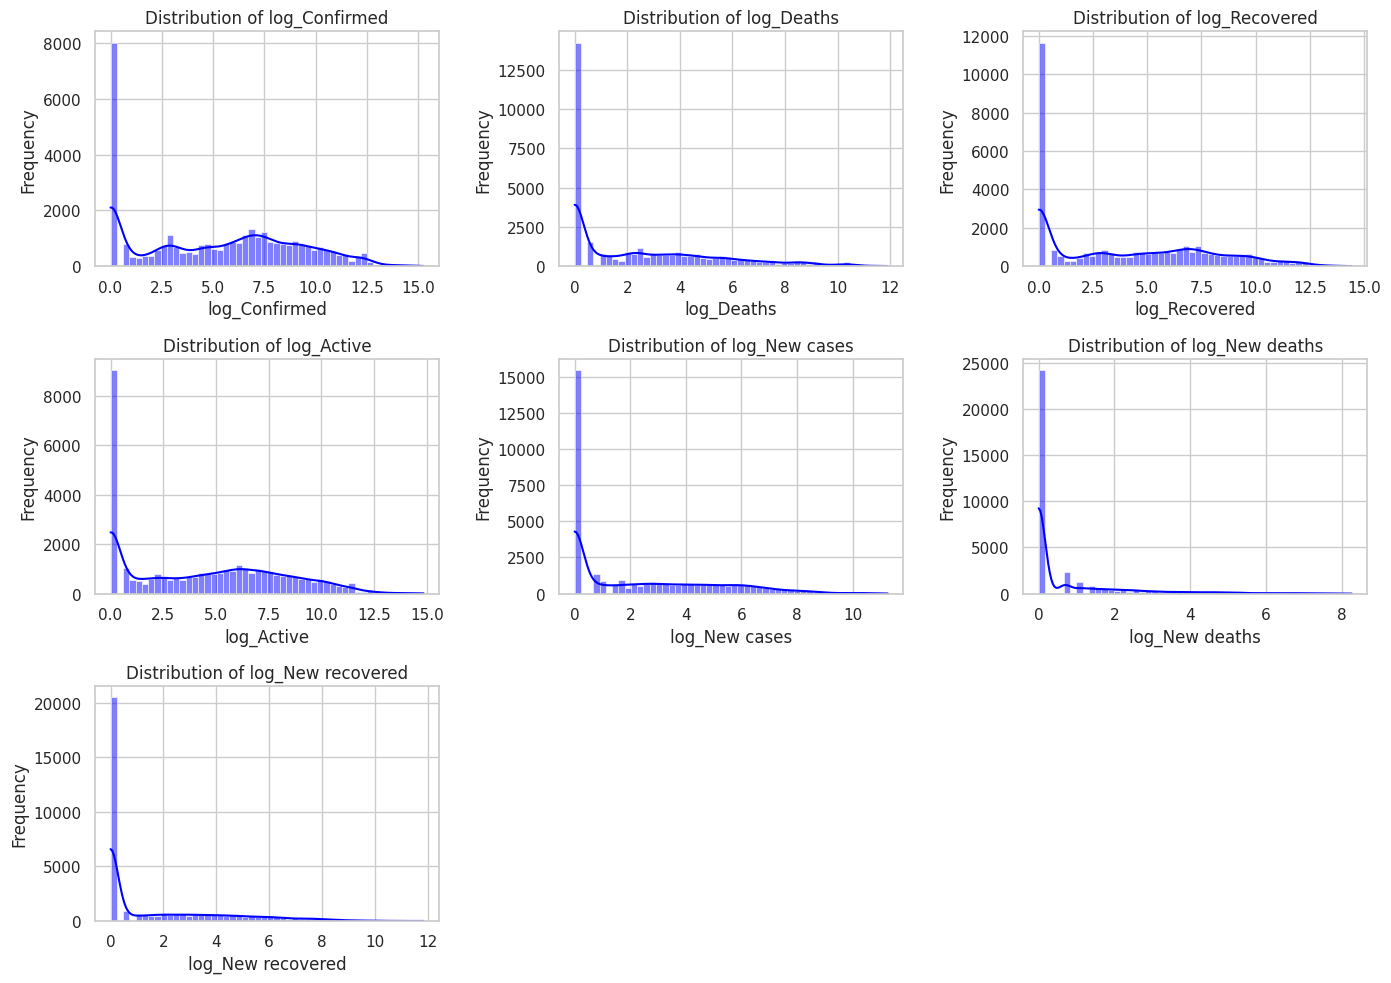

In [ ]:
# List of numerical columns in the dataset
numerical_columns = ['log_Confirmed', 'log_Deaths', 'log_Recovered', 'log_Active', 'log_New cases', 'log_New deaths', 'log_New recovered']

# Set the figure size
plt.figure(figsize=(14, 10))

# Loop through the numerical columns and plot their histograms
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns of subplots
    sns.histplot(df[col], kde=True, color='blue', bins=50)  # You can adjust the number of bins as needed
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


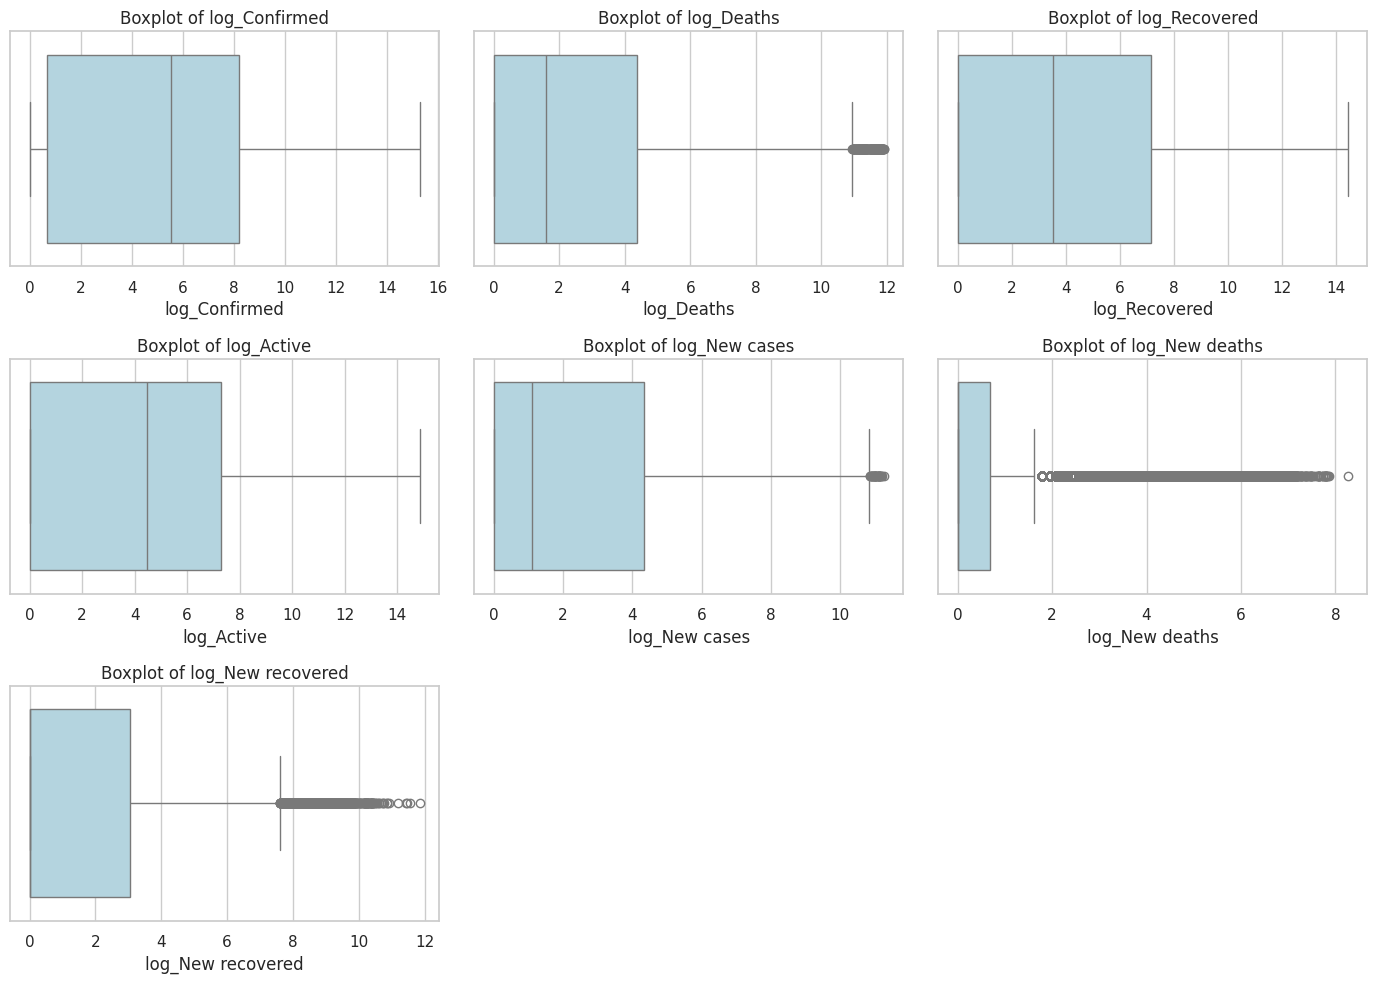

In [ ]:
# Boxplots for all numerical variables to check for outliers
plt.figure(figsize=(14, 10))

# Loop through numerical columns and create boxplots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

column = 'log_New cases'
series = df[column]

# Check for stationarity with ADF test
adf_test = adfuller(series)
adf_result = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Critical Values': adf_test[4],
    'Stationary': adf_test[1] < 0.05
}

# If non-stationary, difference the data
if not adf_result['Stationary']:
    series_diff = series.diff().dropna()
else:
    series_diff = series


print("ADF Test Results:")
print(adf_result)


ADF Test Results:
{'ADF Statistic': -4.305278591513035, 'p-value': 0.0004349550656067334, 'Critical Values': {'1%': -3.4305363025455717, '5%': -2.861622341128934, '10%': -2.5668138275937}, 'Stationary': True}


In [ ]:
model = ARIMA(series_diff, order=(1, 1, 1))
model_fit = model.fit()

# Generate forecasts
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)


35156    3.935871
35157    3.783807
35158    3.766379
35159    3.764382
35160    3.764153
35161    3.764127
35162    3.764124
35163    3.764123
35164    3.764123
35165    3.764123
35166    3.764123
35167    3.764123
35168    3.764123
35169    3.764123
35170    3.764123
35171    3.764123
35172    3.764123
35173    3.764123
35174    3.764123
35175    3.764123
35176    3.764123
35177    3.764123
35178    3.764123
35179    3.764123
35180    3.764123
35181    3.764123
35182    3.764123
35183    3.764123
35184    3.764123
35185    3.764123
Name: predicted_mean, dtype: float64


In [ ]:
print("\nARIMA Model Summary:")
print(model_fit.summary())


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:          log_New cases   No. Observations:                35156
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -78869.824
Date:                Tue, 26 Nov 2024   AIC                         157745.648
Time:                        20:24:22   BIC                         157771.051
Sample:                             0   HQIC                        157753.738
                              - 35156                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1146      0.005     24.904      0.000       0.106       0.124
ma.L1         -0.9977      0.000  -2534.195      0.000      -0.998      -0.997
sigma2         5.2015      0.0

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

In [ ]:
# Calculate RMSE for in-sample prediction
rmse = np.sqrt(mean_squared_error(df['log_New cases'], model_fit.predict()))  # Use model_fit.predict() instead of model.predict()
print(f'RMSE: {rmse}')

RMSE: 2.280654448598319


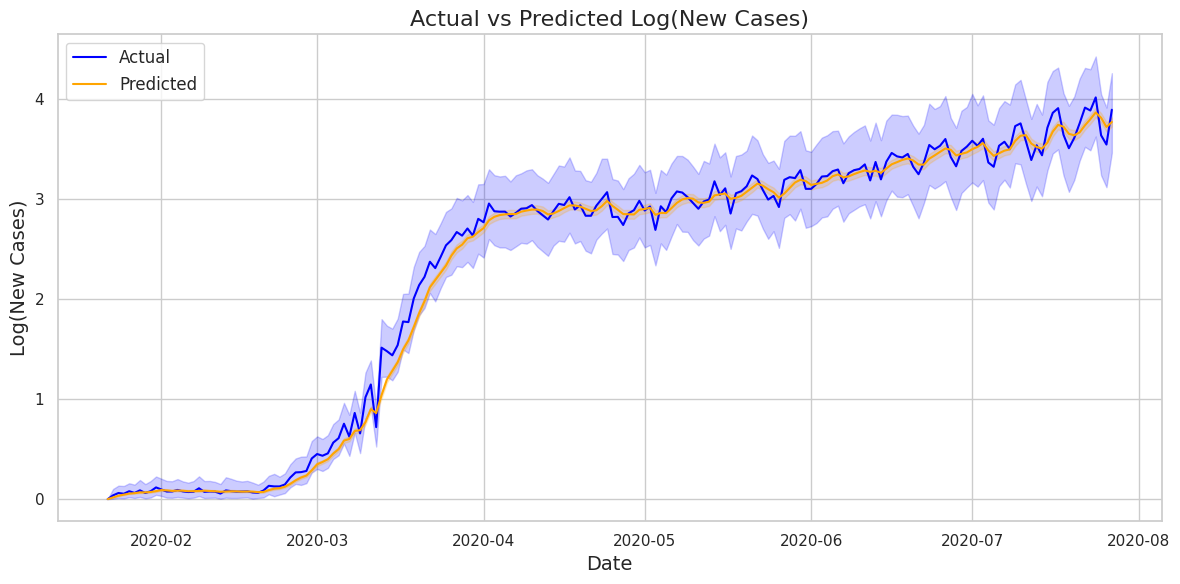

In [ ]:
#plot a graph to show the model performance using seaborn
sns.set_theme(style="whitegrid")

# Create the figure and axes
plt.figure(figsize=(12, 6))

# Plot the actual values
sns.lineplot(x=df['Date'], y=df['log_New cases'], label='Actual', color='blue')

# Plot the predicted values
sns.lineplot(x=df['Date'], y=model_fit.predict(), label='Predicted', color='orange')

# Add labels, title, and legend
plt.title("Actual vs Predicted Log(New Cases)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Log(New Cases)", fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


###Observations

Good Fit:

The predicted values (orange line) closely follow the actual values (blue line), indicating the ARIMA(1, 1, 1) model captures the trends and patterns well.
This is a sign of a well-calibrated model for forecasting.

Confidence Intervals:

Early in the timeline, the intervals are narrow, reflecting lower uncertainty.
As time progresses, the intervals widen, especially towards the later dates. This is expected as future predictions typically carry more uncertainty.

Seasonal and Trend Patterns:

Both lines rise and fall together, reflecting consistent model performance in capturing underlying trends (e.g., exponential growth in "New Cases" early on, followed by a plateau).


# Interpretation of Model Performance
High Agreement:

The close alignment between actual and predicted lines suggests that the model is effectively capturing the dynamics of the data.

Uncertainty:

While confidence intervals widen over time, the predictions remain largely within the bounds, which reinforces the model's reliability for short-term forecasting.